# EDA

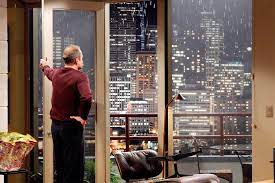

In [3]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
df=pd.read_csv("data/eda.csv")

In [5]:
df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,house_id,id.1
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19206.000,21534.000,21597.000,21597.000,...,21597.000,17749.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,...,1971.000,836.651,98077.952,47.560,-122.214,1986.620,12758.284,540296.574,4580474287.771,10799.000
std,2876735715.748,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,...,29.375,4000.111,53.513,0.139,0.141,685.230,27274.442,367368.140,2876735715.748,6234.661
min,1000102.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,...,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000,78000.000,1000102.000,1.000
25%,2123049175.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,...,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000,322000.000,2123049175.000,5400.000
50%,3904930410.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,...,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000,450000.000,3904930410.000,10799.000
75%,7308900490.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,...,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000,645000.000,7308900490.000,16198.000
max,9900000190.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,...,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000,7700000.000,9900000190.000,21597.000


In [8]:
print(f"shape (#rows , #columns): {df.shape}")


shape (#rows , #columns): (21597, 23)


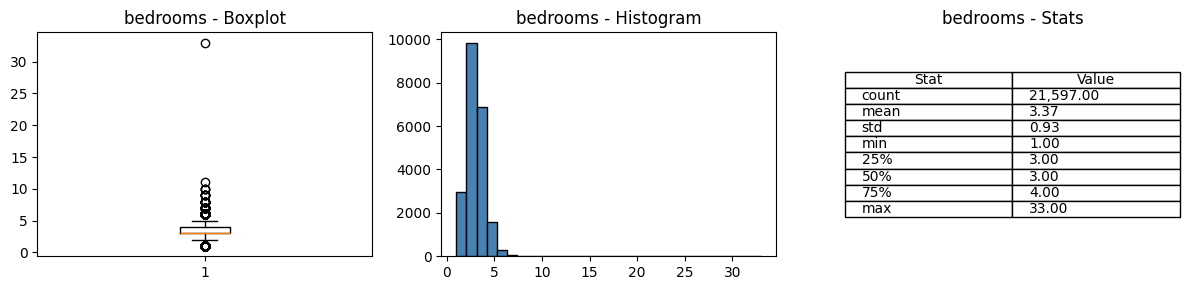

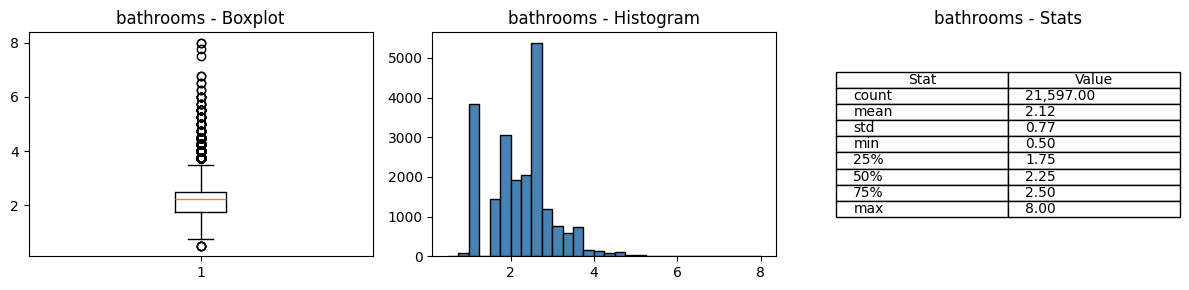

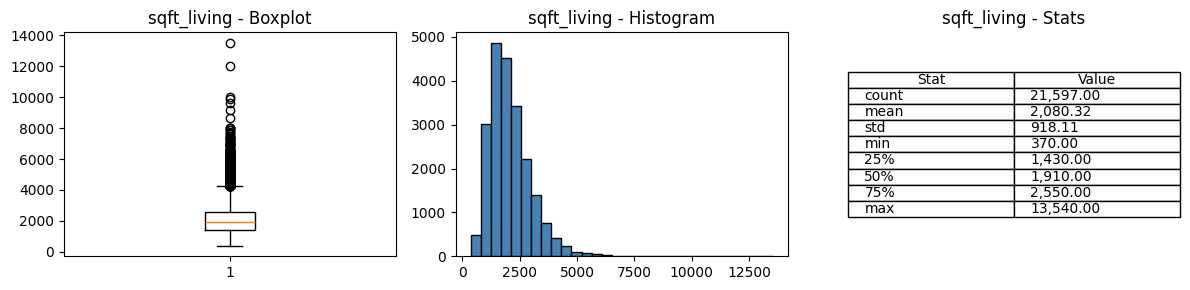

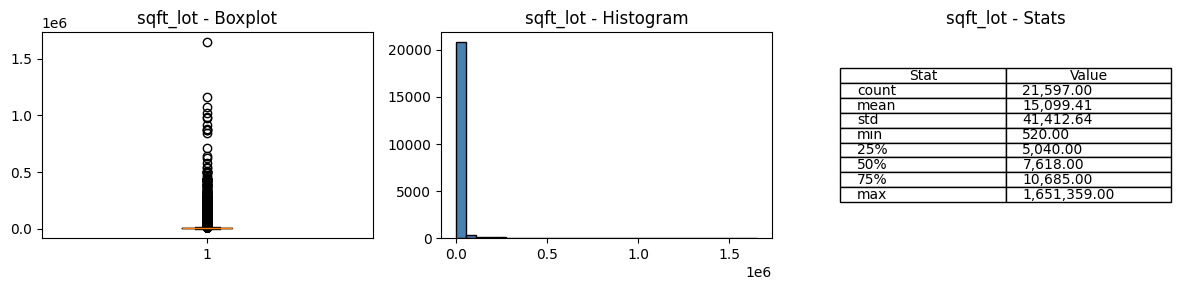

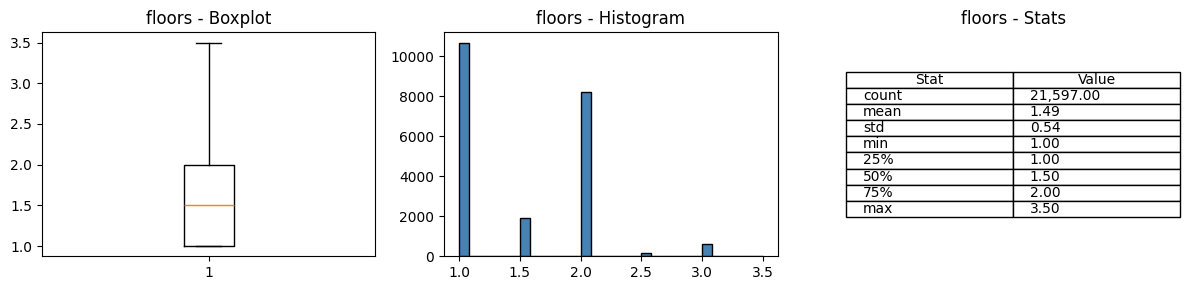

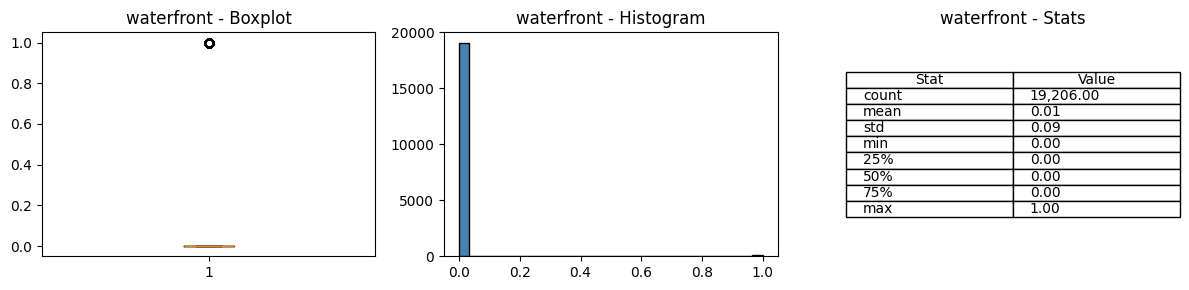

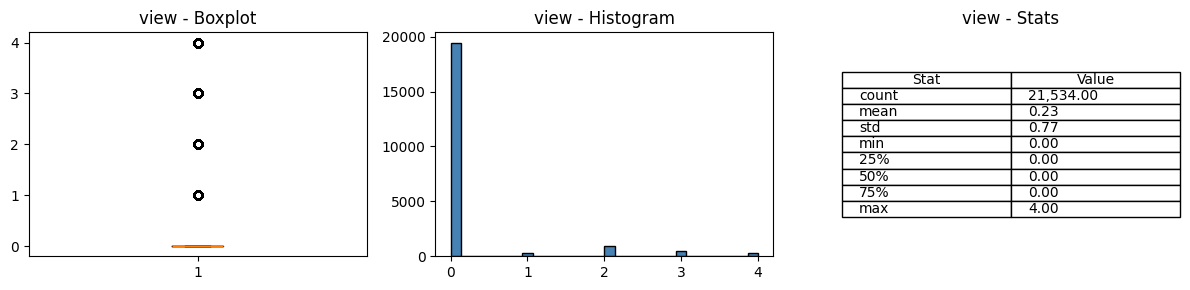

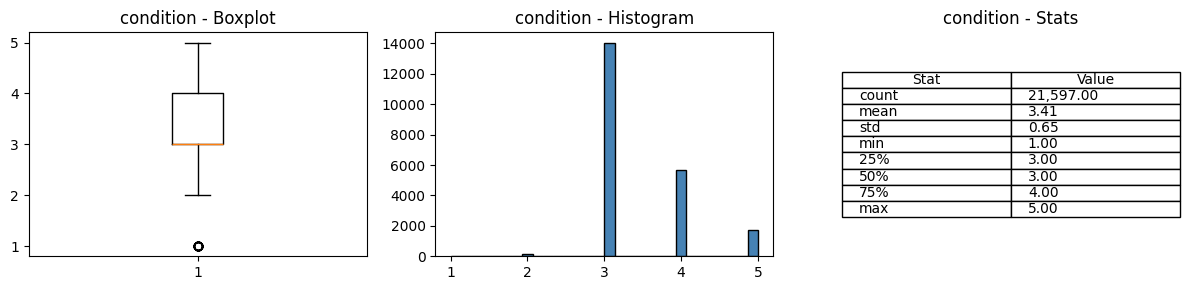

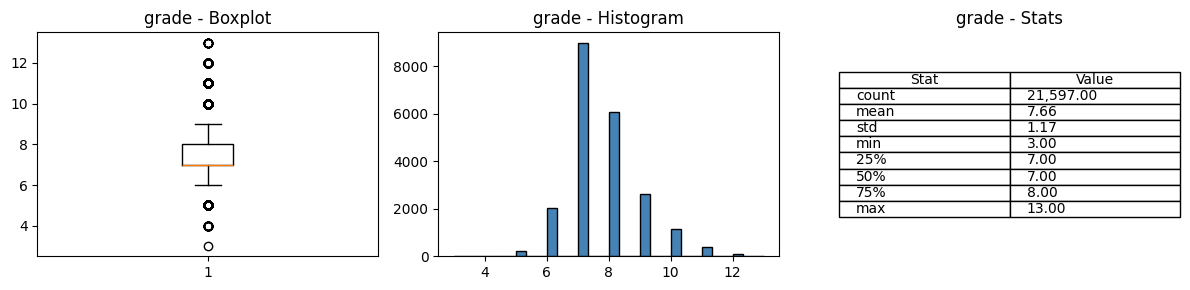

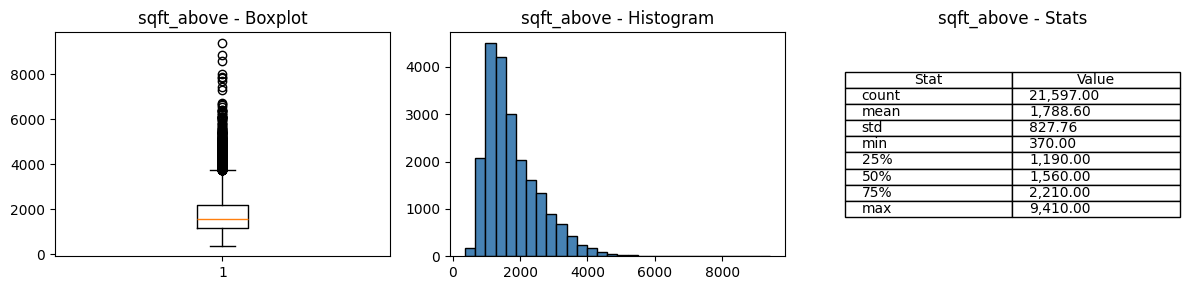

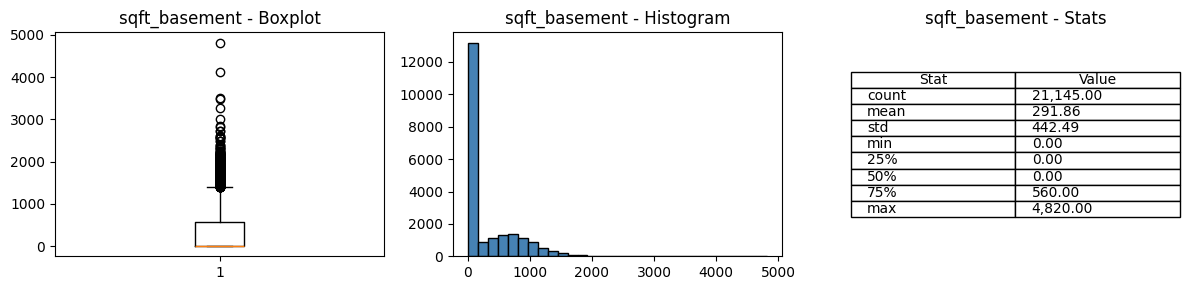

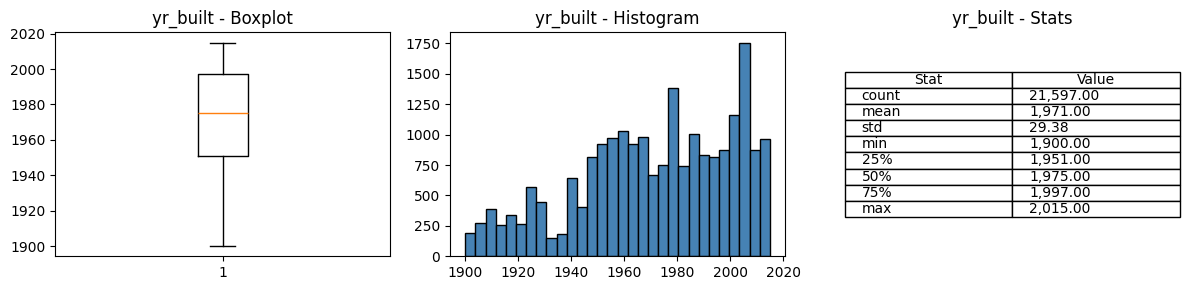

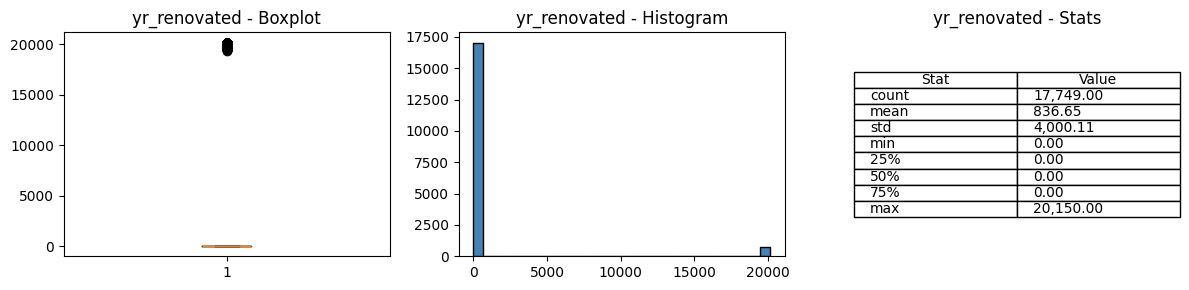

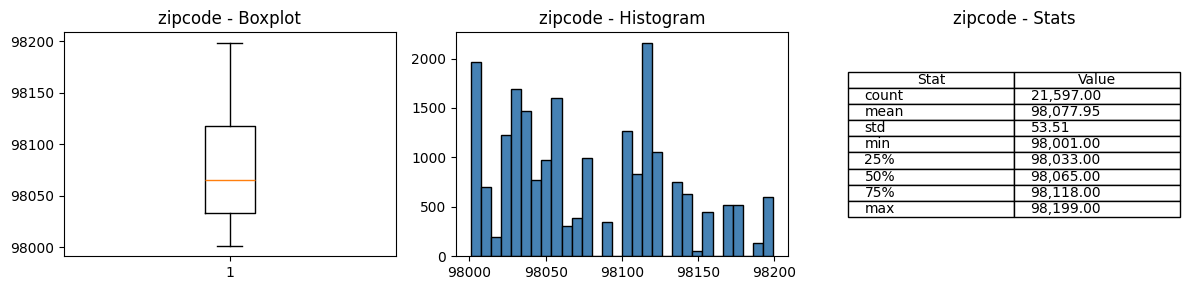

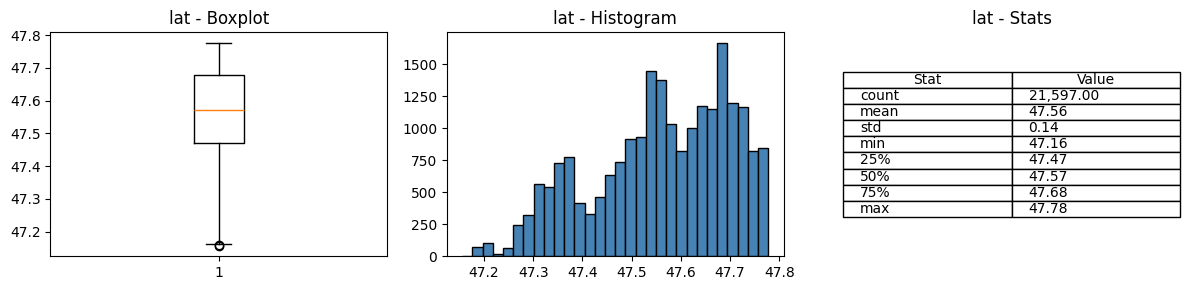

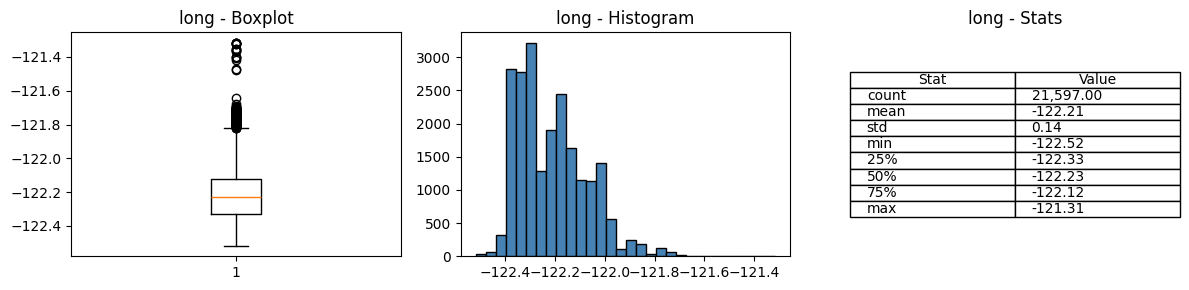

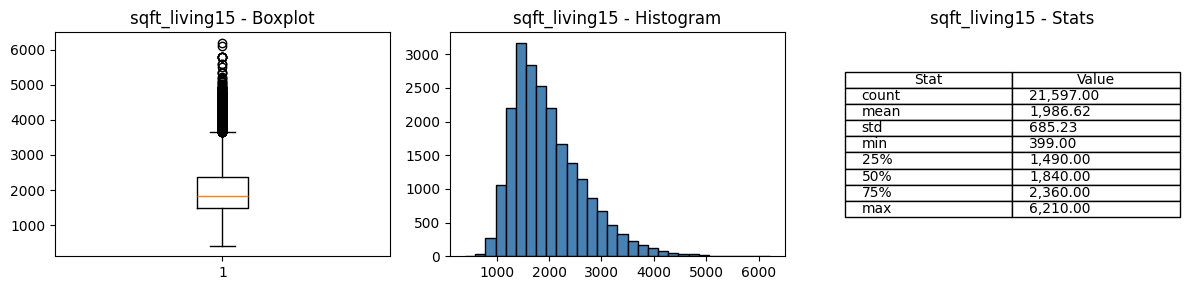

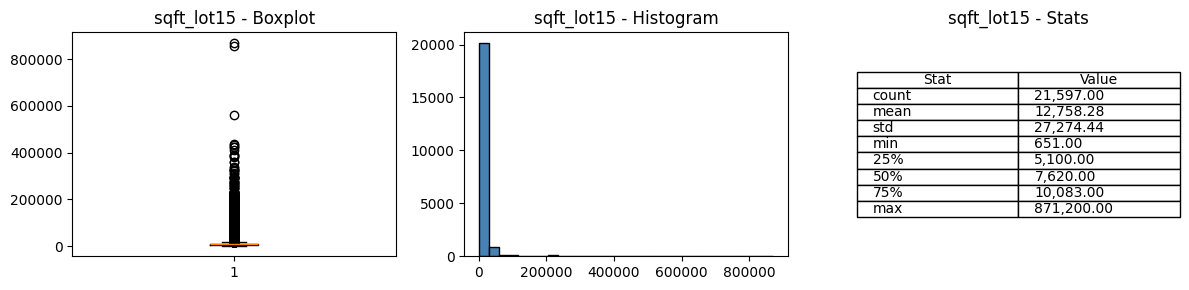

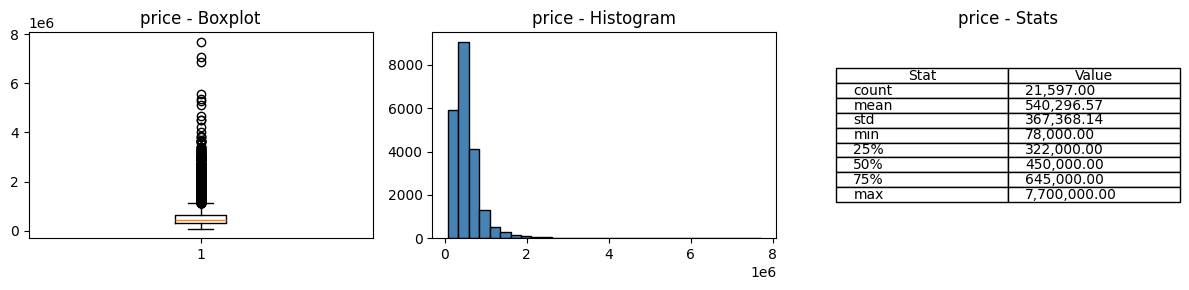

In [22]:
# Drop unnec columns
drop = ['id', 'id.1', 'house_id']

df_clean = df.drop(columns=[c for c in drop if c in df.columns])

# Plot numeric columns: Boxplot + Histogram side by side
numeric_cols = df_clean.select_dtypes(include='number').columns
i=0
for col in numeric_cols:
    i+=1
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3))
    
    # Boxplot
    ax1.boxplot(df_clean[col].dropna(), vert=True)
    ax1.set_title(f'{col} - Boxplot')
    
    # Histogram
    ct,bins,_=ax2.hist(df_clean[col].dropna(), bins=30, color='steelblue', edgecolor='black')
    hist_to_tbl = pd.DataFrame({
        'b1':bins[:-1],
        'b2':bins[1:],
        'count':ct
    })
    #print(hist_to_tbl.head(10))

    ax2.set_title(f'{col} - Histogram')
    
    #Statistic table
    stats = df_clean[col].describe()

    ax3.axis('off')
    table_data = [[k, f'{v:,.2f}'] for k, v in stats.items()]
    ax3.table(cellText=table_data, colLabels=['Stat', 'Value'], loc='center', cellLoc='left')
    ax3.set_title(f'{col} - Stats')
    
    plt.tight_layout()
    plt.show()
    #if i> 2:
    #    break